In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import redis
import seaborn as sns
import pyarrow as pa
from wordcloud import WordCloud, STOPWORDS
import json
%matplotlib inline


In [28]:
pool = redis.ConnectionPool(host="127.0.0.1", port="6379", decode_responses=True)
r = redis.Redis(connection_pool=pool)
data = r.lrange("G1jsmNXCBNyGFcV6", 0, r.llen("G1jsmNXCBNyGFcV6")-1)
data1 = r.lindex("G1jsmNXCBNyGFcV6", 0)
c = [json.loads(x) for x in data]
# pd.read_json(data[1], orient='index').T
table = pd.DataFrame(c)

In [30]:
table.head()

,name,comment,star,time
0,春风和煦,快过生日啦！趁着双十一搞活动，在淘宝上抢先购买了心花相印冰淇淋蛋糕，并提前4天与哈根达斯西单...,40,2020-11-07 06:02
1,李抱抱同学,哈根达斯公众号时不时会送试吃券，快过期了赶紧来消灭它\n\n[服务铃]服务：有个小哥服务特别...,50,2020-10-30 23:45
2,vivian9279,就在家门口的君太百货大楼一层，人不多，服务员很热情，一进门就笑脸相迎，心情愉快，我用的兑换券...,50,2020-10-02 09:51
3,佐藤石野,下班后来西单大悦城Apple看新出的手机，没什么感觉，吃了香锅后来吃冰激凌解腻。\n\n位置...,40,2020-10-29\n 更新于2020-10-30 17:32
4,南方,补一下点评，前段时间到西单这边逛商场，路过这家哈根达斯店面突然想起来有领一张试吃券，正好就直...,50,2020-11-01 09:50


<AxesSubplot:xlabel='star', ylabel='count'>

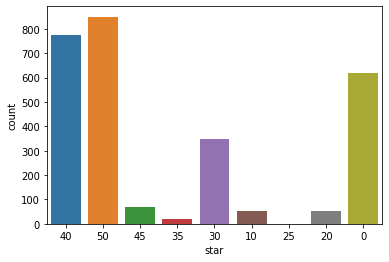

In [33]:
sns.countplot(data=table, x='star')

(0.0, 600.0)

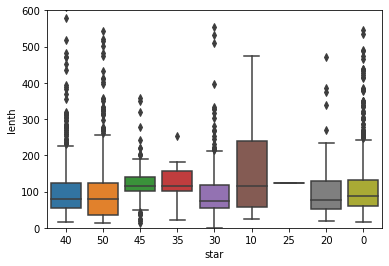

In [35]:
table['lenth'] = table['comment'].str.len()
fig2, ax2=plt.subplots()
sns.boxplot(x='star',y='lenth',data=table, ax=ax2)
ax2.set_ylim(0,600)


In [36]:
table.head()

,name,comment,star,time,lenth
0,春风和煦,快过生日啦！趁着双十一搞活动，在淘宝上抢先购买了心花相印冰淇淋蛋糕，并提前4天与哈根达斯西单...,40,2020-11-07 06:02,393
1,李抱抱同学,哈根达斯公众号时不时会送试吃券，快过期了赶紧来消灭它\n\n[服务铃]服务：有个小哥服务特别...,50,2020-10-30 23:45,171
2,vivian9279,就在家门口的君太百货大楼一层，人不多，服务员很热情，一进门就笑脸相迎，心情愉快，我用的兑换券...,50,2020-10-02 09:51,185
3,佐藤石野,下班后来西单大悦城Apple看新出的手机，没什么感觉，吃了香锅后来吃冰激凌解腻。\n\n位置...,40,2020-10-29\n 更新于2020-10-30 17:32,237
4,南方,补一下点评，前段时间到西单这边逛商场，路过这家哈根达斯店面突然想起来有领一张试吃券，正好就直...,50,2020-11-01 09:50,146


In [50]:
table.time=pd.to_datetime(table.time.str.findall(r'\d{4}-\d{2}-\d{2} .+').str.get(0))
table['year'] = table.time.dt.year
table['month'] = table.time.dt.month
table['weekday'] = table.time.dt.weekday
table['hour'] = table.time.dt.hour

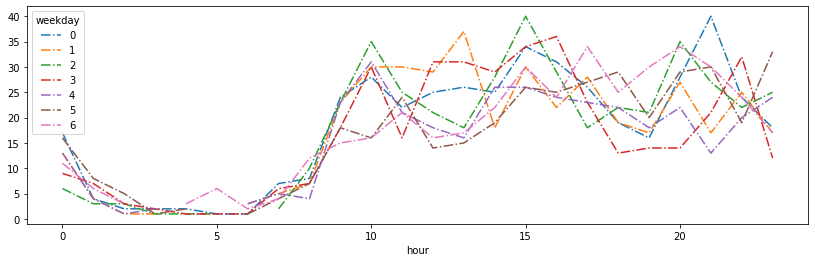

In [52]:
#各星期的小时评论数分布图
fig1, ax1=plt.subplots(figsize=(14,4))
df=table.groupby(['hour', 'weekday']).count()['name'].unstack()
df.plot(ax=ax1, style='-.')
plt.show()

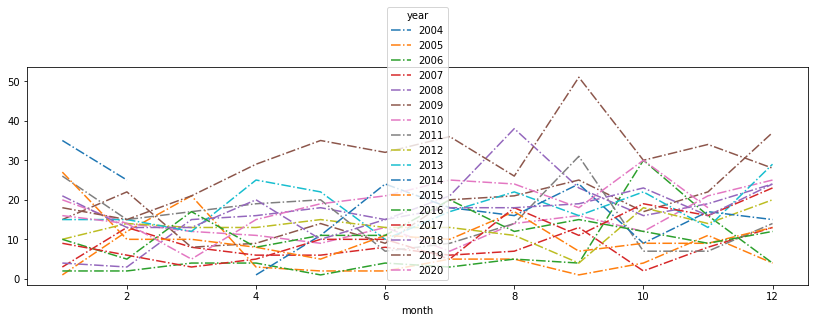

In [53]:
#各月份的小时评论数分布图
fig1, ax1=plt.subplots(figsize=(14,4))
df=table.groupby(['month', 'year']).count()['name'].unstack()
df.plot(ax=ax1, style='-.')
plt.show()